In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/books.csv",error_bad_lines=False)

<ipython-input-2-14fc5f3216c7>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/books.csv",error_bad_lines=False)
Skipping line 4012: expected 10 fields, saw 11
Skipping line 5688: expected 10 fields, saw 11
Skipping line 7056: expected 10 fields, saw 11
Skipping line 10601: expected 10 fields, saw 11
Skipping line 10668: expected 10 fields, saw 11



In [3]:
data.shape

(13714, 10)

In [4]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [8]:
data.drop(['bookID', 'isbn', 'isbn13'],axis=1,inplace=True)

In [9]:
data.shape

(13714, 7)

In [10]:
data.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13714 non-null  object 
 1   authors             13714 non-null  object 
 2   average_rating      13714 non-null  float64
 3   language_code       13714 non-null  object 
 4   # num_pages         13714 non-null  int64  
 5   ratings_count       13714 non-null  int64  
 6   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 750.1+ KB


In [12]:
data.head()

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [14]:
len(np.unique(data.language_code))

30

In [15]:
data.language_code.value_counts().head(10)

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
Name: language_code, dtype: int64

<Axes: xlabel='language_code', ylabel='title'>

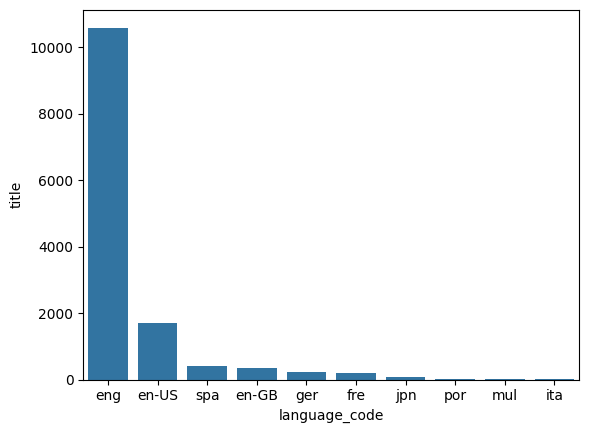

In [22]:
df1 = (data.groupby('language_code')['title'].count().reset_index()
.sort_values('title',ascending=False)).head(10)
sns.barplot(data=df1,x='language_code',y='title')

In [23]:
data.sort_values('ratings_count', ascending=False).head(10)

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
12243,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,498,4367341,93619
2000,The Hobbit or There and Back Again,J.R.R. Tolkien,4.26,eng,366,2364968,31664
1717,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2318478,42016
340,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,eng,736,2279854,20851
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,eng,341,2115562,32694
2505,Animal Farm,George Orwell,3.91,eng,122,2102616,29469
25,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,eng,398,2009749,12784
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613


In [25]:
top_rated = data.groupby(['title', 'authors','language_code'])['average_rating'].sum()
# Sort the results in descending order and take the top 10

top_rated_sorted = top_rated.sort_values(ascending=False).head(10)
top_rated_sorted

title                                                authors                                 language_code
One Hundred Years of Solitude                        Gabriel García Márquez-Gregory Rabassa  eng              36.54
The Lord of the Rings (The Lord of the Rings  #1-3)  J.R.R. Tolkien                          eng              31.43
'Salem's Lot                                         Stephen King                            eng              28.07
Ender's Game (Ender's Saga  #1)                      Orson Scott Card                        eng              21.50
The Enemy (Jack Reacher  #8)                         Lee Child-Dick Hill                     eng              20.85
Cien años de soledad                                 Gabriel García Márquez                  spa              20.30
Deception Point                                      Dan Brown                               eng              18.50
The Glass Castle                                     Jeannette Walls             

In [34]:
data.groupby(['title', 'authors','language_code']).agg({'ratings_count':['sum','mean'],'text_reviews_count':['sum','mean']}).reset_index()

title  \
                                                           
0                          said the shotgun to the head.   
1      $30 Film School: How to Write  Direct  Produce...   
2                                           'Salem's Lot   
3                                           'Salem's Lot   
4                                           'Salem's Lot   
...                                                  ...   
13237                                           鋼之鍊金術師 6   
13238                                           鋼之鍊金術師 7   
13239                                           鋼之鍊金術師 9   
13240                                         魔戒二部曲：雙城奇謀   
13241                                         魔戒首部曲：魔戒現身   

                                authors language_code ratings_count  \
                                                                sum   
0                         Saul Williams         en-US          2687   
1                       Michael W. Dean           eng            29   
2                          Stephen King         en-US           169   
3                          Stephen King           eng        271270   
4        Stephen King-Jerry N. Uelsmann           eng         81170   
...                                 ...           ...           ...   
13237            Hiromu Arakawa-荒川弘-方郁仁           zho             5   
13238            Hiromu Arakawa-荒川弘-方郁仁           zho             5   
13239            Hiromu Arakawa-荒川弘-方郁仁           zho             4   
13240  J.R.R. Tolkien-托爾金-Alan  Lee-朱學恆           zho            20   
13241  J.R.R. Tolkien-托爾金-Alan  Lee-朱學恆           zho            22   

                    text_reviews_count              
               mean                sum        mean  
0       2687.000000                216  216.000000  
1         29.000000                  4    4.000000  
2        169.000000                 33   33.000000  
3      38752.857143               6065  866.428571  
4      81170.000000                504  504.000000  
...             ...                ...         ...  
13237      5.000000                  0    0.000000  
13238      5.000000                  0    0.000000  
13239      4.000000                  0    0.000000  
13240     20.000000                  0    0.000000  
13241     22.000000                  0    0.000000  

[13242 rows x 7 columns]

In [37]:
df2 = data.sort_values('ratings_count', ascending=False).head(10)
df2

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
12243,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,498,4367341,93619
2000,The Hobbit or There and Back Again,J.R.R. Tolkien,4.26,eng,366,2364968,31664
1717,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2318478,42016
340,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,eng,736,2279854,20851
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,eng,341,2115562,32694
2505,Animal Farm,George Orwell,3.91,eng,122,2102616,29469
25,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,eng,398,2009749,12784
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613


<Axes: xlabel='ratings_count', ylabel='title'>

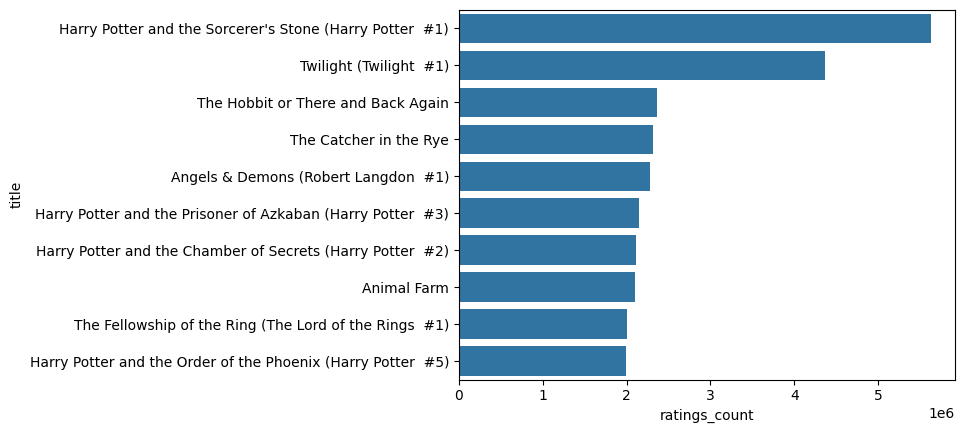

In [39]:
sns.barplot(data=df2,y='title',x='ratings_count')